<a href="https://colab.research.google.com/github/mn22abk/DSProjectHamza2024/blob/main/DSPHamzaFileI(funda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:

def load_data(file_path):
    """Load data from CSV file."""
    return pd.read_csv(file_path)

In [ ]:
def clean_data(df):
    """Drop rows with missing values."""
    return df.dropna()


In [ ]:
def visualize_pairplot(df, features):
    """Generate pairplot for selected features."""
    sns.pairplot(df[features])
    plt.show()


In [ ]:
def visualize_correlation_heatmap(df, features):
    """Generate correlation heatmap for selected features."""
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Selected Features')
    plt.show()

In [ ]:
def prepare_data(df, target_column, non_numeric_columns):
    """Separate features and target variable, and split data into train and test sets."""
    X = df.drop(non_numeric_columns + [target_column], axis=1)
    y = df[target_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

def build_linear_regression_model(X_train, y_train):
    """Train Linear Regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model


In [ ]:
def build_random_forest_model(X_train, y_train):
    """Train Random Forest Regressor model."""
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model

In [ ]:
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance using RMSE."""
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse


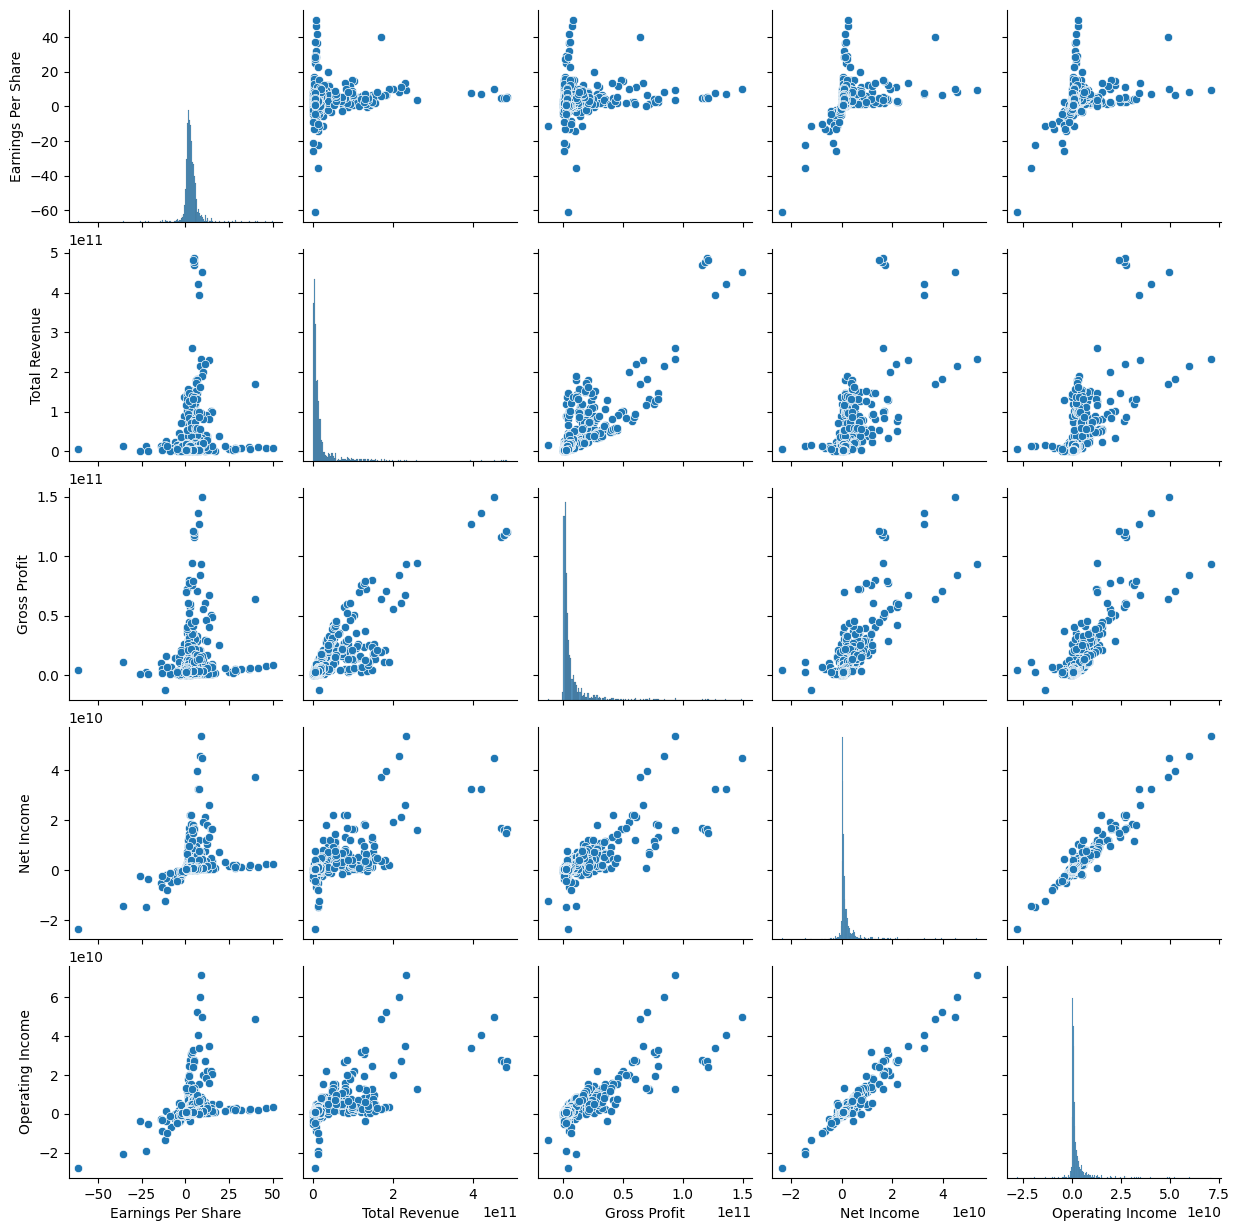

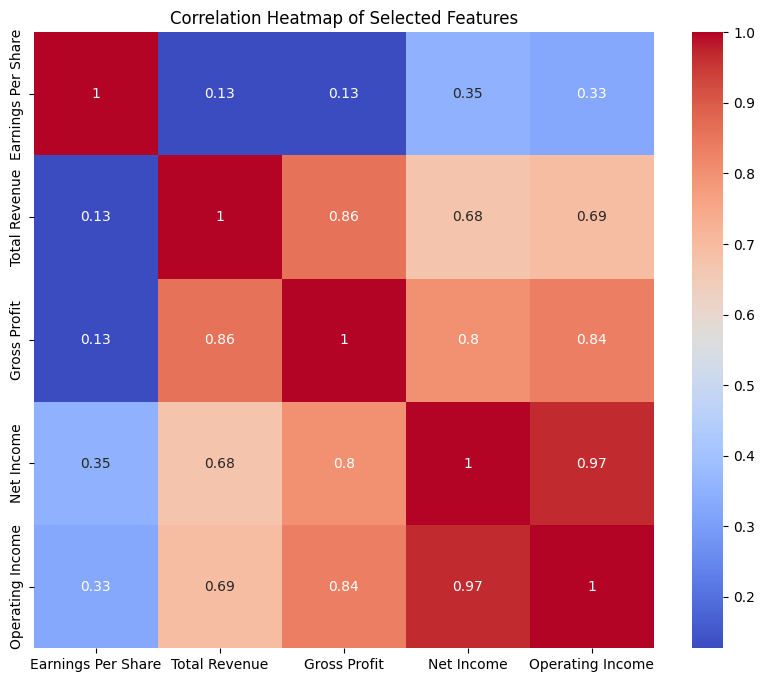

Linear Regression RMSE: 53.66559051385685
Random Forest RMSE: 1.5261551416121588


In [ ]:
if __name__ == "__main__":
    # Load data
    file_path = 'fundamentals.csv'
    fundamentals_df = load_data(file_path)

    # Clean data
    fundamentals_df = clean_data(fundamentals_df)

    # EDA: Visualize pairplot
    selected_features = ['Earnings Per Share', 'Total Revenue', 'Gross Profit', 'Net Income', 'Operating Income']
    visualize_pairplot(fundamentals_df, selected_features)

    # Additional EDA: Visualize correlation heatmap
    visualize_correlation_heatmap(fundamentals_df, selected_features)

    # Prepare data
    target_column = 'Earnings Per Share'
    non_numeric_columns = ['Ticker Symbol', 'Period Ending']
    X_train, X_test, y_train, y_test = prepare_data(fundamentals_df, target_column, non_numeric_columns)

    # Build and evaluate models
    lr_model = build_linear_regression_model(X_train, y_train)
    lr_rmse = evaluate_model(lr_model, X_test, y_test)
    print("Linear Regression RMSE:", lr_rmse)

    rf_model = build_random_forest_model(X_train, y_train)
    rf_rmse = evaluate_model(rf_model, X_test, y_test)
    print("Random Forest RMSE:", rf_rmse)